In [1]:
def create_empty_plot(max_val):
    """
    Helper function to create a figure of the desired dimensions & grid

    :param max_val: dimension of the map along the x and y dimensions
    :return: the fig and ax objects.
    """
    fig, ax = plt.subplots(figsize=(7,7))

    major_ticks = np.arange(0, max_val+1, 5)
    minor_ticks = np.arange(0, max_val+1, 1)
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    ax.set_ylim([-1,max_val])
    ax.set_xlim([-1,max_val])
    ax.grid(True)

    return fig, ax

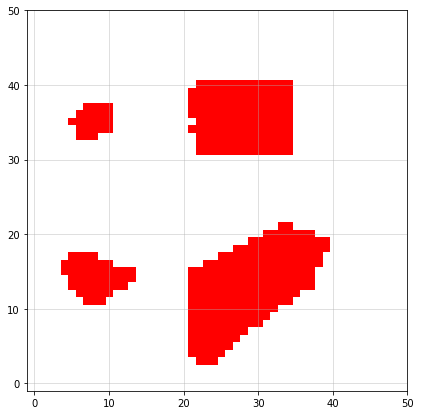

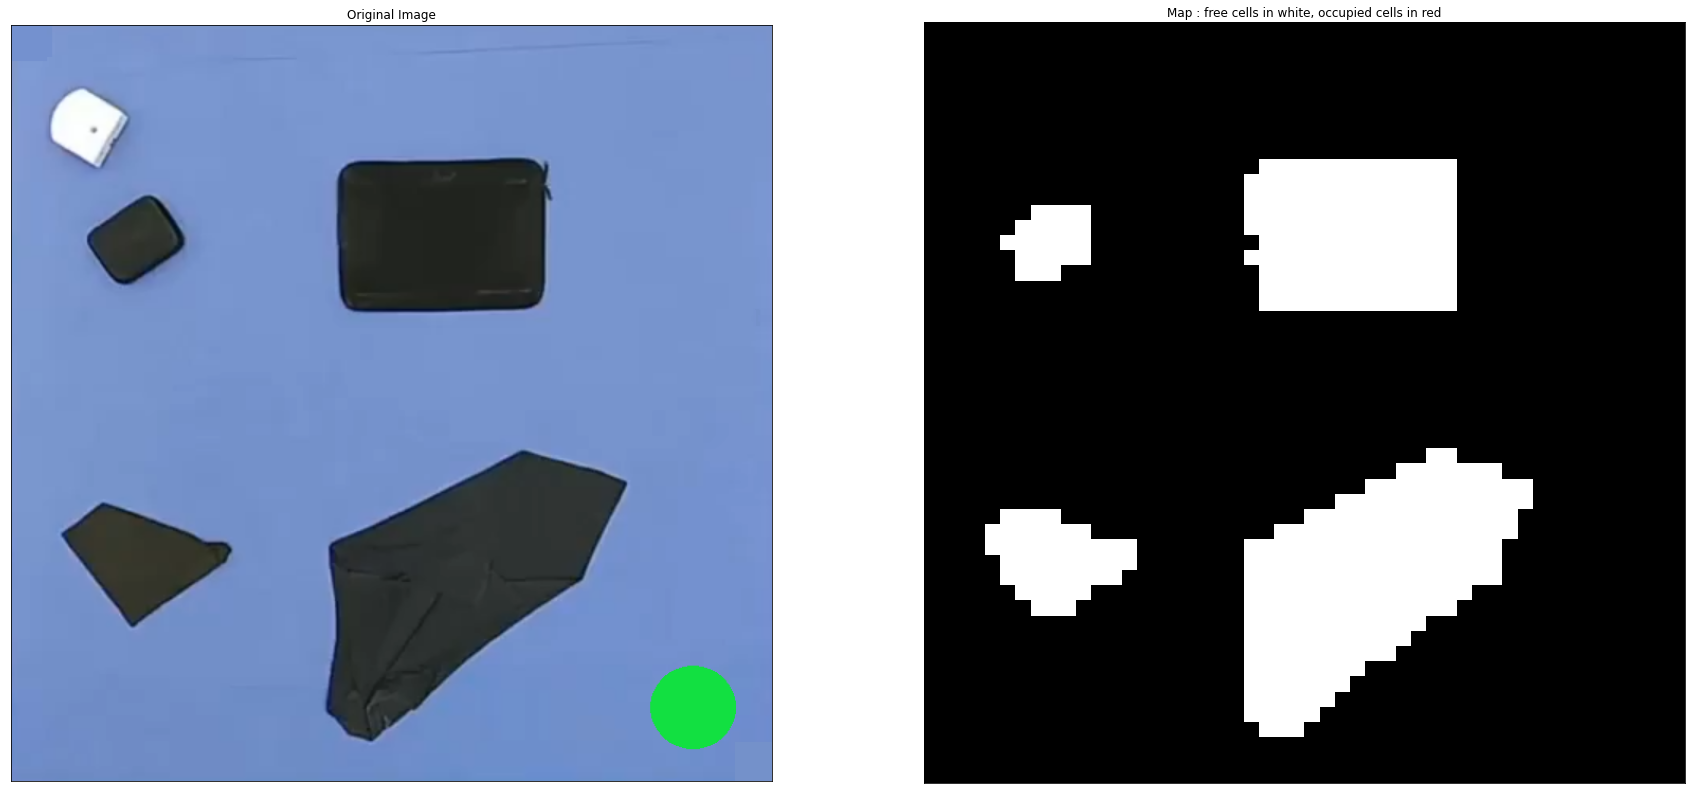

In [2]:
import cv2
import sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

np.set_printoptions(threshold=sys.maxsize)

filename = 'input_picture.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)

grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(grayImage, (50,50), interpolation = cv2.INTER_AREA) 

height, width = resized.shape[:2] # Size of the map
fig, ax = create_empty_plot(width)

ret,thresh1 = cv2.threshold(resized,90,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(30,50))
plt.subplot(121),plt.imshow(img[:,:,::-1])
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh1,cmap = 'gray')
plt.title('Threshold Image'), plt.xticks([]), plt.yticks([])
#data = np.random.rand(max_val, max_val) * 20

cmap = colors.ListedColormap(['white', 'red'])
# limit = 70
occupancy_grid = thresh1.copy()
occupancy_grid = occupancy_grid/255
occupancy_grid = np.array(occupancy_grid, dtype=int)
occupancy_grid = np.flip(occupancy_grid, 0)
# occupancy_grid[edges>limit] = 1
# occupancy_grid[edges<=limit] = 0

ax.imshow(occupancy_grid, cmap=cmap)
plt.title("Map : free cells in white, occupied cells in red");

plt.show()

#occupancy_grid